# Heart Disease Prediction By Raymond Musoke

## Importing the necessary project libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import shap

### Loading the Heart Dataset

In [16]:
# I'm Using the Cleveland Heart Disease dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]


df = pd.read_csv(url, names=column_names, na_values='?')

df.shape

(303, 14)

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The features include are;
- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal - pain, 3: asymptomatic)
- trestbps: resting blood pressure (mm Hg)
- chol: serum cholesterol (mg/dl)
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)


### Data Exploration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Check for missing values

In [19]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Statistics like std, mean

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Data preprocessing

Fill in missing values using mean imputation for numerical features

In [23]:
imputer = SimpleImputer(strategy='mean')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

# check missing values again
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Convert target to binary (0: no disease, 1: disease) as mentioned in clinical focus

In [24]:
df['target'] = (df['target'] > 0).astype(int)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


view target distribution

In [25]:
df['target'].value_counts()

,count
target,
0,164
1,139


view disease prevalence by mean target

In [26]:
df['target'].mean()

np.float64(0.45874587458745875)

### More data analysis

Target distribution

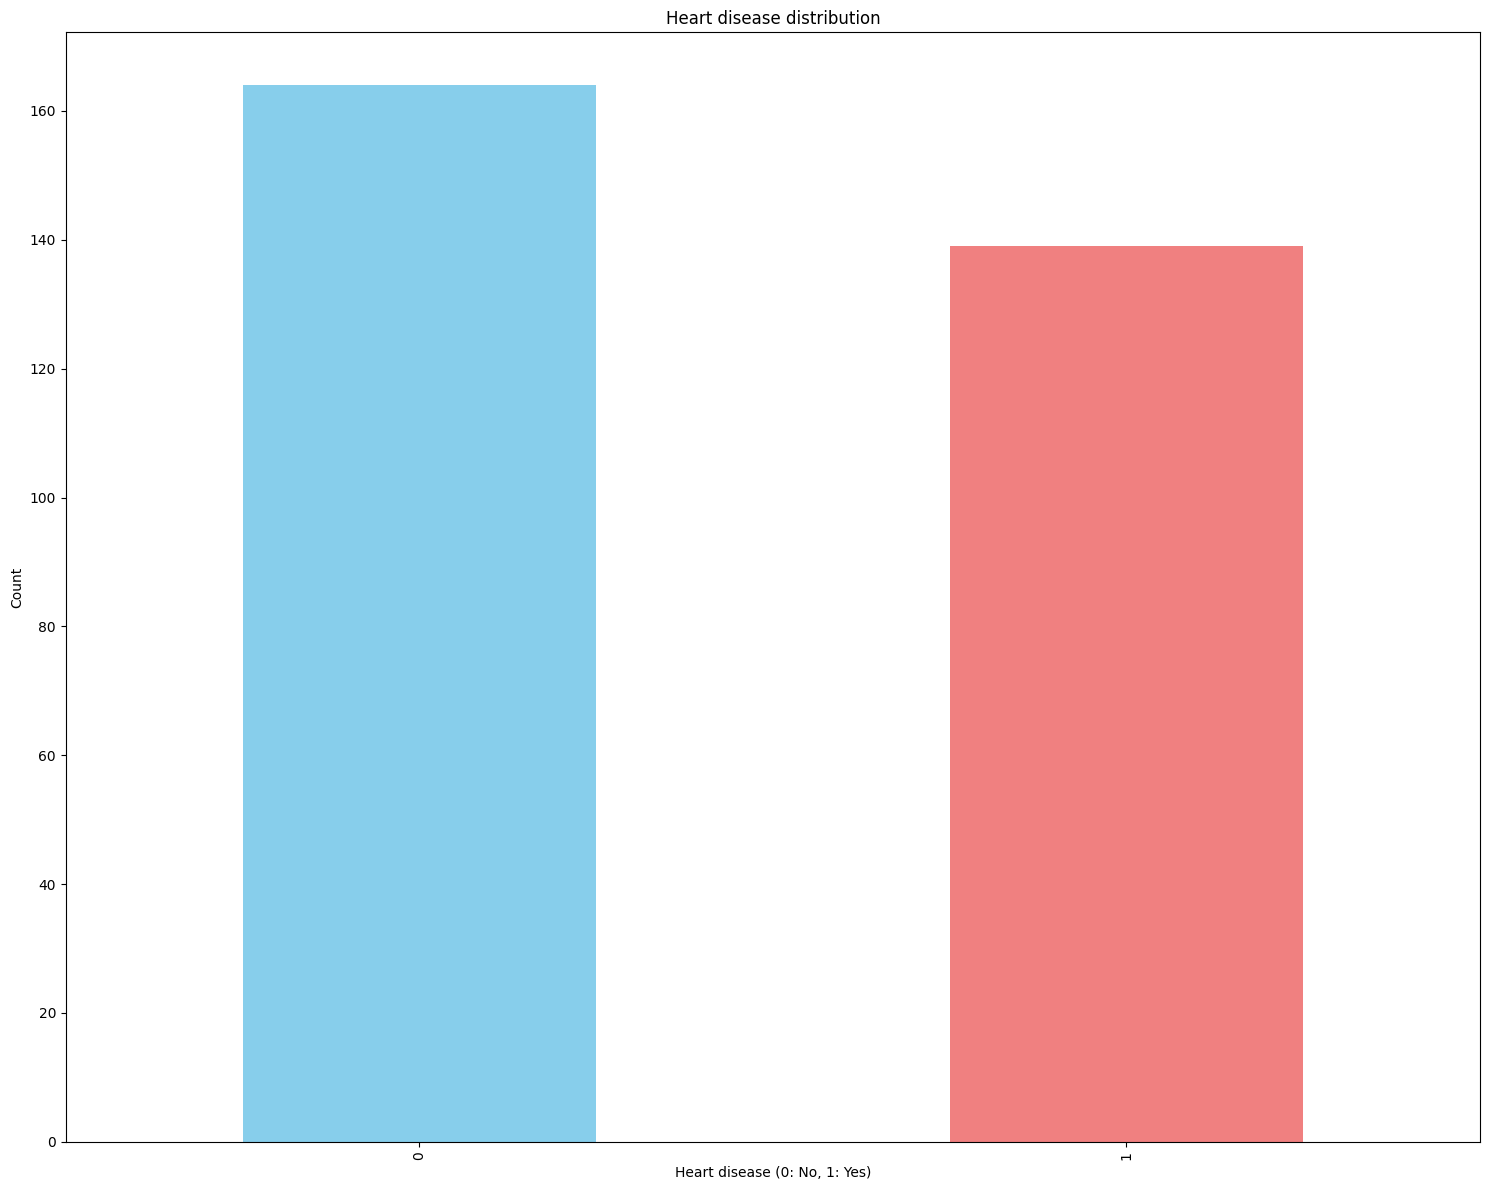

In [30]:
plt.figure(figsize=(15, 12))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Heart disease distribution')
plt.xlabel('Heart disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Age distribution by target (disease or no disease)

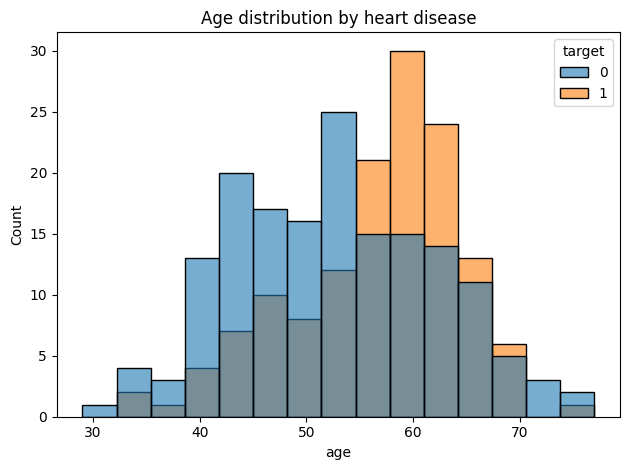

In [31]:
sns.histplot(data=df, x='age', hue='target', bins=15, alpha=0.6)
plt.title('Age distribution by heart disease')

plt.tight_layout()
plt.show()

Cholestral distribution

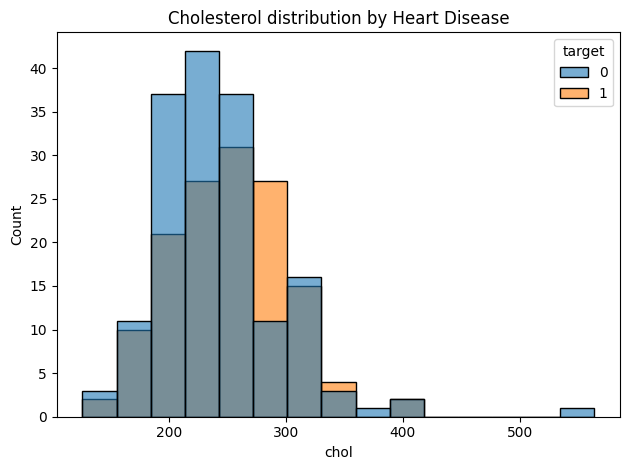

In [32]:
sns.histplot(data=df, x='chol', hue='target', bins=15, alpha=0.6)
plt.title('Cholesterol distribution by Heart Disease')
plt.tight_layout()
plt.show()

Showing maximum heart rate distribution

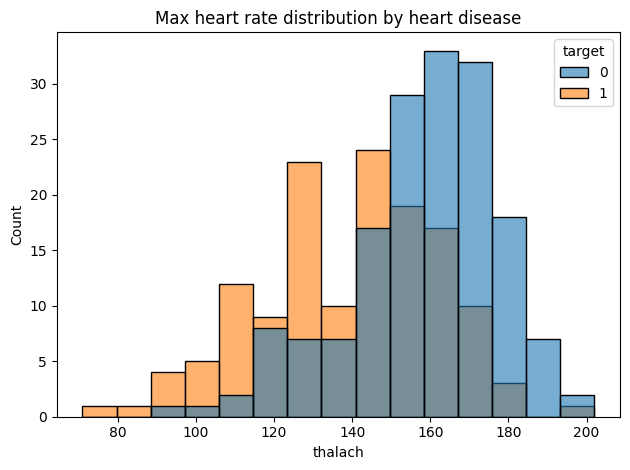

In [35]:
sns.histplot(data=df, x='thalach', hue='target', bins=15, alpha=0.6)
plt.title('Max heart rate distribution by heart disease')
plt.tight_layout()
plt.show()

Correlation heatmap

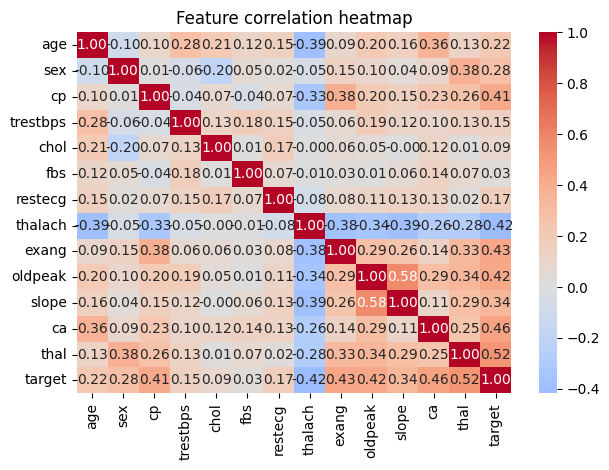

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature correlation heatmap')

plt.tight_layout()
plt.show()


Showing chest pain type vs heart disease

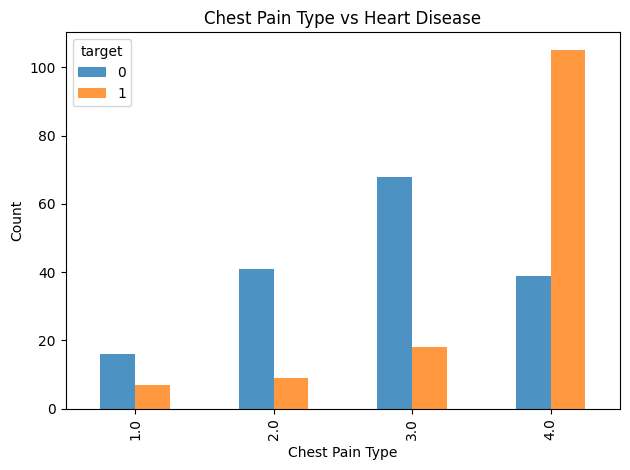

In [37]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', alpha=0.8)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Splitting the dataset
80% training and 20% testing

In [38]:
X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((303, 13), (303,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scale the features using standard scaler

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((242, 13), (61, 13))

### Model selection

Logistic regression, KNN and random forest are chosen for classifying heart disease. The best model will be taken.

In [49]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

train and evaluate each model

In [48]:
trained_models = {}
model_performance = {}

for name, model in models.items():
    print(f"Training {name}")

    model.fit(X_train_scaled, y_train)

    # making predictions
    y_pred = model.predict(X_test_scaled)

    # show metrics
    print(classification_report(y_test, y_pred))


Training Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Training K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        33
           1       0.80      1.00      0.89        28

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.89        61
weighted avg       0.91      0.89      0.88        61

Training Random Forest
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87    

KNN selected since it gives a better F1 score and good precision on the positive class - disease (1)

### Model training
Train KNN model

In [51]:
# hyperparameter tuning for better performance

# perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid={
    'n_neighbors': [3, 5, 7, 9],
      'weights': ['uniform', 'distance']
}, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

trained_model = grid_search.best_estimator_
trained_model

KNeighborsClassifier(n_neighbors=3)

In [52]:
#best parameters
grid_search.best_score_

np.float64(0.8193208913248498)

In [67]:
# best parameters
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

### Evaluaton
Using testing set  

In [54]:
y_pred = trained_model.predict(X_test_scaled)

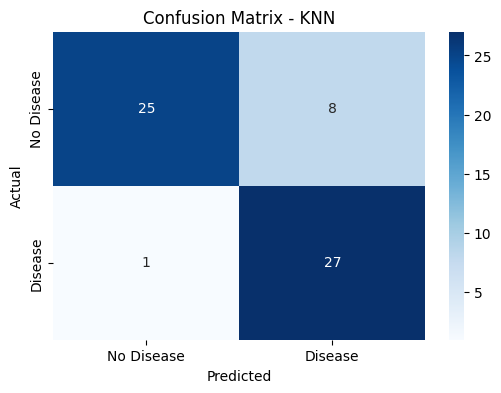

In [55]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - KNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Interpretation of the Model with SHAP

In [63]:
def predict_proba_wrapper(X):
    return trained_model.predict_proba(X)

# instantiate KernelExplainer with a subset of the training data as the background dataset
explainer = shap.KernelExplainer(predict_proba_wrapper, X_train_scaled[:100])

# calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:50])

print("SHAP values generated for the KNN model.")

  0%|          | 0/50 [00:00<?, ?it/s]

SHAP values generated for the KNN model.


Create SHAP summary plot

<Figure size 1000x800 with 0 Axes>

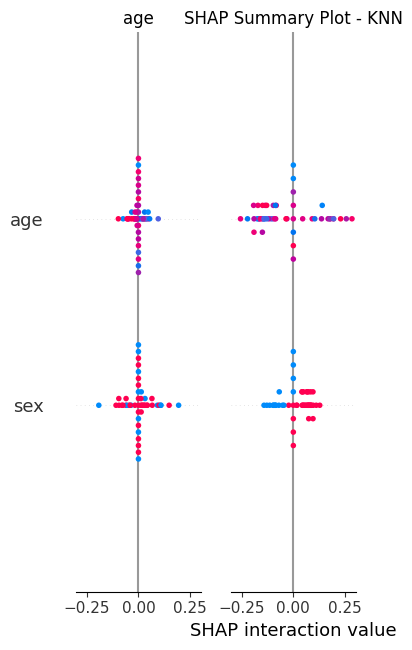

In [64]:
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled[:50], feature_names=X.columns, show=False)
plt.title(f'SHAP Summary Plot - KNN')
plt.tight_layout()
plt.show()

Analysing Features

Feature Importance Ranking:
     feature  importance
12      thal    0.123004
11        ca    0.082946
1        sex    0.062147
8      exang    0.049148
9    oldpeak    0.047047
10     slope    0.045095
2         cp    0.041819
6    restecg    0.040355
7    thalach    0.032030
0        age    0.021145
3   trestbps    0.018503
5        fbs    0.017818
4       chol    0.016335


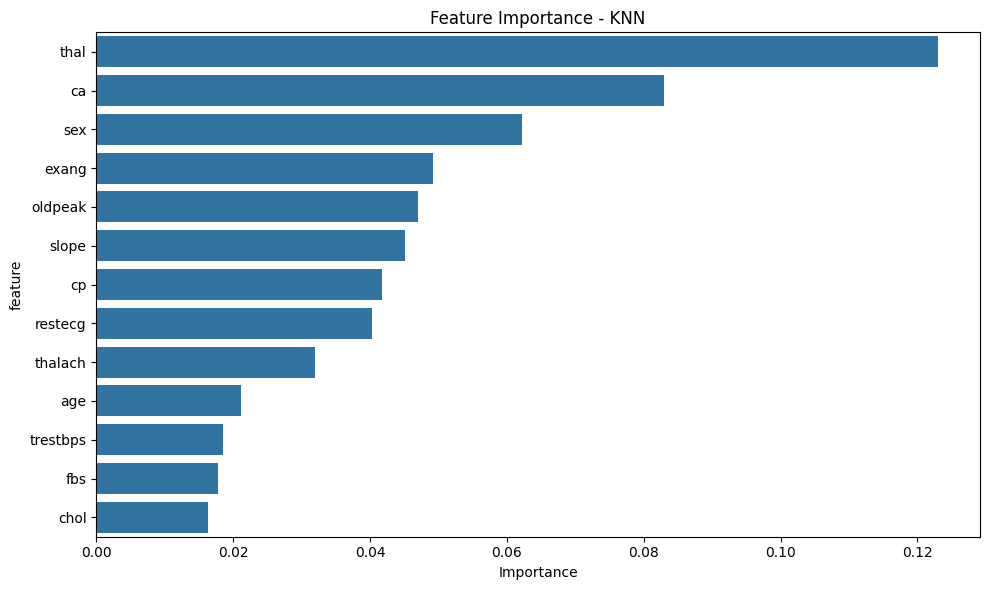

In [69]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.mean(np.abs(shap_values[:,:,1]), axis=0)
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title(f'Feature Importance - KNN')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

The Clinical Application and Intrepretaion

Analyze top features for clinical relevance

In [70]:
top_features = feature_importance.head(5)['feature'].tolist()
print(f"\nTop 5 Most Important Clinical Features:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")


Top 5 Most Important Clinical Features:
1. thal
2. ca
3. sex
4. exang
5. oldpeak


Create a simple risk assessment example

In [76]:
sample_patient = X_test_scaled[11:12]
sample_original = X_test.iloc[11:12]

prediction = trained_model.predict(sample_patient)[0]
probability = trained_model.predict_proba(sample_patient)[0][1]

print(f"\nRisk Assessment:")
print(f"  Heart Disease Prediction: {'HIGH RISK' if prediction == 1 else 'LOW RISK'}")
print(f"  Probability of Disease: {probability:.1%}")

if probability > 0.7:
    print("  Clinical Action: Recommend further diagnostic tests and consultation")
elif probability > 0.3:
    print("  Clinical Action: Monitor closely and consider lifestyle changes")
else:
    print("  Clinical Action: Low risk - routine monitoring recommended")


Risk Assessment:
  Heart Disease Prediction: HIGH RISK
  Probability of Disease: 66.7%
  Clinical Action: Monitor closely and consider lifestyle changes
